In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300

In [2]:
# matches_data = pd.read_csv("V-League 1 2021.csv", delimiter = ';')
matches_data = pd.read_csv("A-League 2021-22.csv", delimiter = ';')
matches_data

,Team,xG for,xG against,Penalties,Penalties conceded,Goals,Goals conceded
0,Newcastle Jets,1.81,1.21,0,0,4,0
1,Wellington Phoenix,1.21,1.81,0,0,0,4
2,Adelaide United,1.45,1.71,0,0,1,2
3,Western Sydney Wanderers,1.71,1.45,0,0,2,1
4,Perth Glory,2.62,0.24,1,0,0,0
...,...,...,...,...,...,...,...
185,Melbourne Victory,0.55,1.38,0,0,1,0
186,Perth Glory,1.18,1.60,0,0,1,1
187,Adelaide United,1.60,1.18,0,0,1,1
188,Melbourne City,2.59,2.02,0,0,2,1


In [3]:
def team_splitting(csv_file, team_name):
    
    matches_played = []
    non_penalty_xg_for = 0
    xg_difference = 0
    
    for i in range(len(csv_file)):
        
        if (csv_file['Team'][i] == team_name):
            
            if csv_file['Goals'][i] > csv_file['Goals conceded'][i]:
                match_result = 'W'
            elif csv_file['Goals'][i] == csv_file['Goals conceded'][i]:
                match_result = 'D'
            else:
                match_result = 'L'
            
            if (csv_file['Penalties'][i] == 0) and (csv_file['Penalties conceded'][i] == 0):
                xg_difference = csv_file['xG for'][i] - csv_file['xG against'][i]
                
                matches_played.append([csv_file['xG for'][i], csv_file['xG against'][i], xg_difference, match_result])
                
            elif (csv_file['Penalties'][i] != 0) and (csv_file['Penalties conceded'][i] != 0):
                
                non_penalty_xg_for = csv_file['xG for'][i] - (csv_file['Penalties'][i] * 0.76)
                non_penalty_xg_against = csv_file['xG against'][i] - (csv_file['Penalties conceded'][i] * 0.76)
                xg_difference = abs(non_penalty_xg_for) - abs(non_penalty_xg_against)
                
                matches_played.append([abs(non_penalty_xg_for), abs(non_penalty_xg_against), xg_difference, match_result])
                
            elif (csv_file['Penalties'][i] != 0) and (csv_file['Penalties conceded'][i] == 0):
                
                non_penalty_xg_for = csv_file['xG for'][i] - (csv_file['Penalties'][i] * 0.76)
                xg_difference = non_penalty_xg_for - csv_file['xG against'][i]
                
                matches_played.append([abs(non_penalty_xg_for), csv_file['xG against'][i], xg_difference, match_result])
                
            elif (csv_file['Penalties'][i] == 0) and (csv_file['Penalties conceded'][i] != 0):
                
                non_penalty_xg_against = csv_file['xG against'][i] - (csv_file['Penalties conceded'][i] * 0.76)
                xg_difference = csv_file['xG for'][i] - non_penalty_xg_against
                
                matches_played.append([csv_file['xG for'][i], abs(non_penalty_xg_against), xg_difference, match_result])
    
    return matches_played

In [4]:
# V-League 1 teams

# binh_duong = team_splitting(matches_data, "Becamex Binh Duong")
# ha_noi = team_splitting(matches_data, "Ha Noi")
# hai_phong = team_splitting(matches_data, "Hai Phong")
# hcmc = team_splitting(matches_data, "Ho Chi Minh City")
# hagl = team_splitting(matches_data, "Hoang Anh Gia Lai")
# ha_tinh = team_splitting(matches_data, "Hong Linh Ha Tinh")
# nam_dinh = team_splitting(matches_data, "Nam Dinh")
# sai_gon = team_splitting(matches_data, "Sai Gon")
# da_nang = team_splitting(matches_data, "Da Nang")
# nghe_an = team_splitting(matches_data, "Song Lam Nghe An")
# binh_dinh = team_splitting(matches_data, "Topenland Binh Dinh")
# quang_ninh = team_splitting(matches_data, "Than Quang Ninh")
# thanh_hoa = team_splitting(matches_data, "Thanh Hoa")
# viettel = team_splitting(matches_data, "Viettel")

In [5]:
# A-League teams

adelaide_utd = team_splitting(matches_data, "Adelaide United")
brisbane_roar = team_splitting(matches_data, "Brisbane Roar")
cc_mariners = team_splitting(matches_data, "Central Coast Mariners")
macarthur = team_splitting(matches_data, "Macarthur")
melbourne_city = team_splitting(matches_data, "Melbourne City")
melbourne_victory = team_splitting(matches_data, "Melbourne Victory")
newcastle_jets = team_splitting(matches_data, "Newcastle Jets")
perth_glory = team_splitting(matches_data, "Perth Glory")
sydney = team_splitting(matches_data, "Sydney")
wellington_phoenix = team_splitting(matches_data, "Wellington Phoenix")
western_sydney = team_splitting(matches_data, "Western Sydney Wanderers")
western_united = team_splitting(matches_data, "Western United")

In [7]:
def average_calculator(matches_array):
    
    total_xg = 0
    total_xga = 0
    
    average_xg = 0
    average_xga = 0
    
    for i in range(len(matches_array)):
        total_xg = total_xg + matches_array[i][0]
        total_xga = total_xga + matches_array[i][1]
        
    average_xg = total_xg / len(matches_array)   
    average_xga = total_xga / len(matches_array)
    
    return [average_xg, average_xga]

In [8]:
# V-League 1 teams

# binh_duong_average = average_calculator(binh_duong)
# ha_noi_average = average_calculator(ha_noi)
# hai_phong_average = average_calculator(hai_phong)
# hcmc_average = average_calculator(hcmc)
# hagl_average = average_calculator(hagl)
# ha_tinh_average = average_calculator(ha_tinh)
# nam_dinh_average = average_calculator(nam_dinh)
# sai_gon_average = average_calculator(sai_gon)
# da_nang_average = average_calculator(da_nang)
# nghe_an_average = average_calculator(nghe_an)
# binh_dinh_average = average_calculator(binh_dinh)
# quang_ninh_average = average_calculator(quang_ninh)
# thanh_hoa_average = average_calculator(thanh_hoa)
# viettel_average = average_calculator(viettel)

In [9]:
# A-League teams

adelaide_average = average_calculator(adelaide_utd)
brisbane_average = average_calculator(brisbane_roar)
mariners_average = average_calculator(cc_mariners)
macarthur_average = average_calculator(macarthur)
mcity_average = average_calculator(melbourne_city)
mvic_average = average_calculator(melbourne_victory)
newcastle_average = average_calculator(newcastle_jets)
perth_average = average_calculator(perth_glory)
sydney_average = average_calculator(sydney)
wellington_average = average_calculator(wellington_phoenix)
wsw_average = average_calculator(western_sydney)
wunited_average = average_calculator(western_united)

In [11]:
league_max_xg = 0
non_penalty_xg = 0

for i in range(len(matches_data)):
    
    if matches_data['Penalties'][i] == 0:
        
        if matches_data['xG for'][i] > league_max_xg:
            league_max_xg = matches_data['xG for'][i]
            
    else:
        non_penalty_xg = matches_data['xG for'][i] - (matches_data['Penalties'][i] * 0.76)
        
        if non_penalty_xg > league_max_xg:
            league_max_xg = non_penalty_xg
            
        non_penalty_xg = 0
        
x_ticks = []
y_ticks = []

if league_max_xg > round(league_max_xg):
    league_max_xg = round(league_max_xg) + 1
else:
    league_max_xg = int(round(league_max_xg))

for i in range (0, league_max_xg):
    x_ticks.append(i)
    y_ticks.append(i)

In [12]:
y_ticks

[0, 1, 2, 3, 4]

In [13]:
robotoLight = fm.FontProperties(fname='./Roboto-Light_0.ttf')
robotoRegular = fm.FontProperties(fname='./Roboto-Regular_0.ttf')
robotoBold = fm.FontProperties(fname='./Roboto-Bold_0.ttf')
compasseLight = fm.FontProperties(fname='./Compasse Light.ttf')
compasseRegular = fm.FontProperties(fname='./Compasse Regular.ttf')

In [14]:
def plot_drawing(team_name, matches_array, average_stats, column_no, row_no, dot_size, font):
    
    edge_color = ''
    
    for i in range(len(matches_array)):
        
        if matches_array[i][3] == 'W':
            edge_color = 'darkgoldenrod'
        elif matches_array[i][3] == 'D':
            edge_color = 'orange'
        elif matches_array[i][3] == 'L':
            edge_color = 'indigo'
        
        if matches_array[i][2] < 0:
            axs[column_no, row_no].scatter(matches_array[i][0], matches_array[i][1], c = 'red', edgecolor = edge_color, s = dot_size)
        else:
            axs[column_no, row_no].scatter(matches_array[i][0], matches_array[i][1], c = 'cyan', edgecolor = edge_color, s = dot_size)
            
    axs[column_no, row_no].scatter(average_stats[0], average_stats[1], color = 'green', edgecolor = 'black', s = dot_size)
    
    axs[column_no, row_no].axline((0, 0), slope = 1, color = 'black', lw = 0.75)
    
    axs[column_no, row_no].set_title(team_name, fontproperties = font)
    
    return None

In [15]:
dot_size = 12
font_dict = {'color': 'black'}
background_colour = 'white'

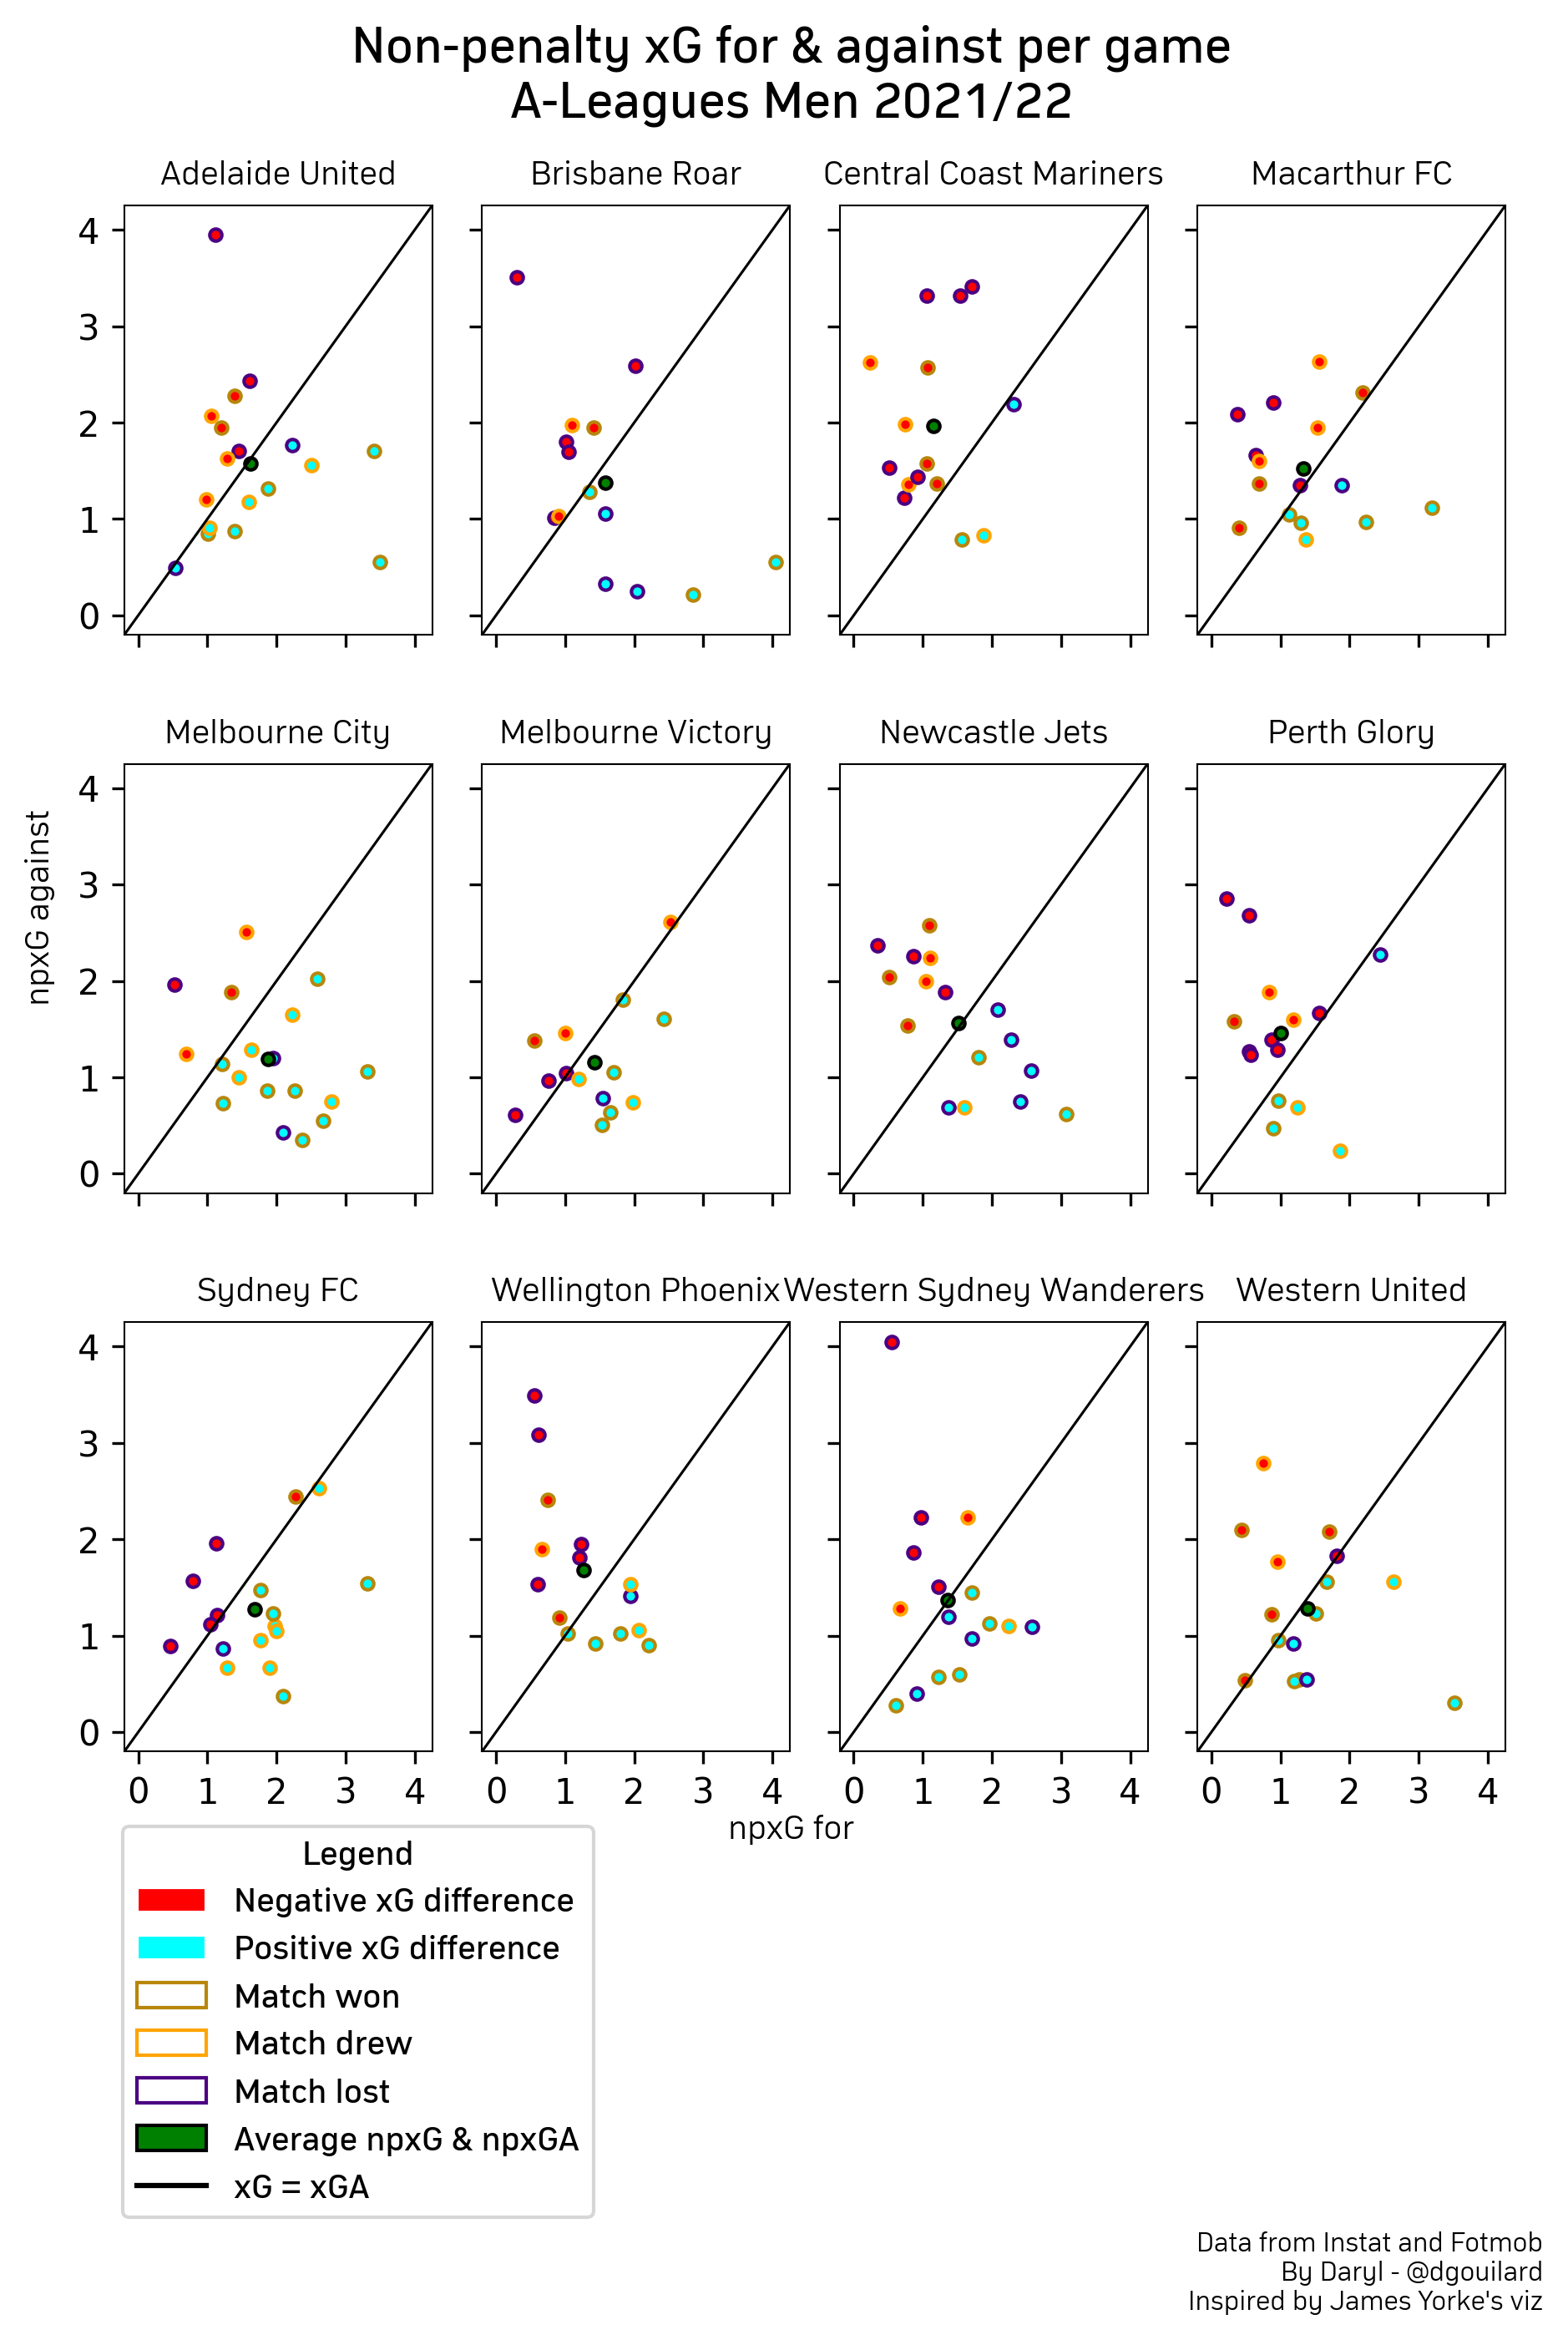

In [16]:
fig = plt.figure()
fig.set_facecolor(background_colour)

with plt.rc_context({'axes.edgecolor': 'black',
                     'xtick.color': 'black', 'ytick.color': 'black',
                     'axes.titlecolor': 'black', 'axes.titlesize': 10, 
                     'axes.linewidth': 0.5, 
                     'axes.facecolor': background_colour}):
    
    
    axs = fig.subplots(4, 4, sharey = True, sharex = True)
    fig.suptitle('Non-penalty xG for & against per game\nA-Leagues Men 2021/22', fontdict = font_dict, fontproperties = compasseRegular, size = 15)
    
    axs[0, 0].set_yticks(y_ticks, labels = y_ticks)
    axs[0, 0].set_xticks(x_ticks, labels = x_ticks)
    axs[2, 0].xaxis.set_tick_params(which = 'both', labelbottom = True)
    axs[2, 1].xaxis.set_tick_params(which = 'both', labelbottom = True)
    axs[2, 2].xaxis.set_tick_params(which = 'both', labelbottom = True)
    axs[2, 3].xaxis.set_tick_params(which = 'both', labelbottom = True)
    
#     plot_drawing("Becamex Binh Duong", binh_duong, binh_duong_average, 0, 0, dot_size, compasseLight)
#     plot_drawing("Dong A Thanh Hoa", thanh_hoa, thanh_hoa_average, 0, 1, dot_size, compasseLight)
#     plot_drawing("Ha Noi FC", ha_noi, ha_noi_average, 0, 2, dot_size, compasseLight)
#     plot_drawing("Hai Phong FC", hai_phong, hai_phong_average, 0, 3, dot_size, compasseLight)
#     plot_drawing("Ho Chi Minh City", hcmc, hcmc_average, 1, 0, dot_size, compasseLight)
#     plot_drawing("Hoang Anh Gia Lai", hagl, hagl_average, 1, 1, dot_size, compasseLight)
#     plot_drawing("Hong Linh Ha Tinh", ha_tinh, ha_tinh_average, 1, 2, dot_size, compasseLight)
#     plot_drawing("Nam Dinh FC", nam_dinh, nam_dinh_average, 1, 3, dot_size, compasseLight)
#     plot_drawing("Sai Gon FC", sai_gon, sai_gon_average, 2, 0, dot_size, compasseLight)
#     plot_drawing("SHB Da Nang", da_nang, da_nang_average, 2, 1, dot_size, compasseLight)
#     plot_drawing("Song Lam Nghe An", nghe_an, nghe_an_average, 2, 2, dot_size, compasseLight)
#     plot_drawing("Than Quang Ninh", quang_ninh, quang_ninh_average, 2, 3, dot_size, compasseLight)
#     plot_drawing("Topenland Binh Dinh", binh_dinh, binh_dinh_average, 3, 2, dot_size, compasseLight)
#     plot_drawing("Viettel", viettel, viettel_average, 3, 3, dot_size, compasseLight)
    
    plot_drawing("Adelaide United", adelaide_utd, adelaide_average, 0, 0, dot_size, compasseLight)
    plot_drawing("Brisbane Roar", brisbane_roar, brisbane_average, 0, 1, dot_size, compasseLight)
    plot_drawing("Central Coast Mariners", cc_mariners, mariners_average, 0, 2, dot_size, compasseLight)
    plot_drawing("Macarthur FC", macarthur, macarthur_average, 0, 3, dot_size, compasseLight)
    plot_drawing("Melbourne City", melbourne_city, mcity_average, 1, 0, dot_size, compasseLight)
    plot_drawing("Melbourne Victory", melbourne_victory, mvic_average, 1, 1, dot_size, compasseLight)
    plot_drawing("Newcastle Jets", newcastle_jets, newcastle_average, 1, 2, dot_size, compasseLight)
    plot_drawing("Perth Glory", perth_glory, perth_average, 1, 3, dot_size, compasseLight)
    plot_drawing("Sydney FC", sydney, sydney_average, 2, 0, dot_size, compasseLight)
    plot_drawing("Wellington Phoenix", wellington_phoenix, wellington_average, 2, 1, dot_size, compasseLight)
    plot_drawing("Western Sydney Wanderers", western_sydney, wsw_average, 2, 2, dot_size, compasseLight)
    plot_drawing("Western United", western_united, wunited_average, 2, 3, dot_size, compasseLight)
    
    # Turn unused subplots off
    axs[3, 0].set_axis_off()
    axs[3, 1].set_axis_off()
    axs[3, 2].set_axis_off()
    axs[3, 3].set_axis_off()
    
    plt.tight_layout()

plt.subplots_adjust(bottom = -1.3, top = 0.8, hspace = 0.3)

positive_difference = mpatches.Patch(fc = 'red', ec = 'white')
negative_difference = mpatches.Patch(fc = 'cyan', ec = 'white')
match_won = mpatches.Patch(fc = 'white', ec = 'darkgoldenrod')
match_drew = mpatches.Patch(fc = 'white', ec = 'orange')
match_lost = mpatches.Patch(fc = 'white', ec = 'indigo')
average_xg_xga = mpatches.Patch(color = 'green', ec = 'black')
xg_equal_xga = mlines.Line2D([], [], color = 'black')

# Settings for 14-team leagues
# fig.text(0.5, -1.4, 'npxG for', ha = 'center', color = 'black', fontproperties = compasseLight)
# fig.text(-0.01, 0.1, 'npxG against', va = 'center', rotation = 'vertical', color = 'black', fontproperties = compasseLight)
# fig.text(1, -1.45, "By Daryl - @dgouilard", ha = 'right', color = 'black', fontproperties = compasseLight, size = 8)

# fig.legend(handles = [positive_difference, negative_difference, match_won, match_drew, match_lost, average_xg_xga, xg_equal_xga], 
#            labels = ['Positive xG difference', 'Negative xG difference', 'Match won', 'Match drew', 'Match lost', 'Average npxG & npxGA', 'xG = xGA'],
#            title = 'Legend', title_fontproperties = compasseRegular, prop = compasseRegular,
#            bbox_to_anchor = (0.45, -0.85))

# Settings for 12-team leagues
fig.text(0.5, -0.83, 'npxG for', ha = 'center', color = 'black', fontproperties = compasseLight)
fig.text(-0.01, 0.1, 'npxG against', va = 'center', rotation = 'vertical', color = 'black', fontproperties = compasseLight)
fig.text(1, -1.3, "Data from Instat and Fotmob\nBy Daryl - @dgouilard\nInspired by James Yorke's viz", 
         ha = 'right', color = 'black', fontproperties = compasseLight, size = 8)

fig.legend(handles = [positive_difference, negative_difference, match_won, match_drew, match_lost, average_xg_xga, xg_equal_xga], 
           labels = ['Negative xG difference', 'Positive xG difference', 'Match won', 'Match drew', 'Match lost', 'Average npxG & npxGA', 'xG = xGA'],
           title = 'Legend', title_fontproperties = compasseRegular, prop = compasseRegular,
           bbox_to_anchor = (0.38, -0.8))